In [1]:
import numpy as np
from PlotTools import create_subplot
from view_factor_calculator import ViewFactorCalculator
import matplotlib.pyplot as plt

In [2]:
# Parameters
r_f = 20
h_f_values = np.array([20, 80/3, 40, 80])
b_values   = h_f_values/0.5
d = np.linspace(r_f + 0.05, 10*r_f, 50)
p = 0.01

# VF_Cylinder shape: (len(b_values), len(p_values), len(d))
VF_Cylinder = np.zeros((len(h_f_values), len(b_values), len(d)))
VF_Cylinder_half = np.zeros((len(h_f_values), len(b_values), len(d)))
View_Angle = np.zeros((len(h_f_values), len(b_values), len(d)))


for h_idx, h_f in enumerate(h_f_values):
    for b_idx, b_val in enumerate(b_values):
        for d_idx, d_val in enumerate(d): 
            VF_Cylinder[h_idx, b_idx, d_idx] = ViewFactorCalculator.analytical_cylinder(
                    h_f, 2*r_f, d_val, p, b_val
                )[0]
            View_Angle[h_idx, b_idx, d_idx] = ViewFactorCalculator.analytical_cylinder(
                    h_f, 2*r_f, d_val, p, b_val
                )[1]
            VF_Cylinder_half[h_idx, b_idx, d_idx] = ViewFactorCalculator.analytical_cylinder(
                    h_f, 2*r_f, d_val, p, b_val
                )[2]
# Now, for each b_idx, VF_Cylinder[b_idx, p_idx, :] gives the profile for each p as a function of d.

In [3]:
r_f = 20
d = np.linspace(2*r_f, 25*r_f, 50)
p = 0.01

# Cylinder
h_sensor = np.array([20/3, 10, 40/3])
VF_cylinder = np.zeros((len(d), len(h_sensor)))
VF_cylinder_half = np.zeros((len(d), len(h_sensor)))

VF_cone = np.zeros((len(d), len(h_sensor)))
VF_cone_half = np.zeros((len(d), len(h_sensor)))

for i in range(len(d)):
    for j in range(len(h_sensor)):
        VF_cylinder[i, j] = ViewFactorCalculator.analytical_cylinder(20, 2*20, d[i], p, h_sensor[j])[0]
        VF_cylinder_half[i, j] = ViewFactorCalculator.analytical_cylinder(20, 2*20, d[i], p, h_sensor[j])[2]

        VF_cone[i, j] = ViewFactorCalculator.analytical_cone(20, 2*20, d[i], 0, p, h_sensor[j])[0]
        VF_cone_half[i, j] = ViewFactorCalculator.analytical_cone(20, 2*20, d[i], 0, p, h_sensor[j])[2]

/tmp/ipykernel_1792010/3709202721.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels([fr'{i/r_f:.0f} $r_f$' for i in ax[0].get_xticks()])
/tmp/ipykernel_1792010/3709202721.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels([fr'{i/r_f:.0f} $r_f$' for i in ax[1].get_xticks()])
/tmp/ipykernel_1792010/3709202721.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels([fr'{i/r_f:.0f} $r_f$' for i in ax[1].get_xticks()])


Text(-0.05, 1.05, '$\\textbf{b)}$')

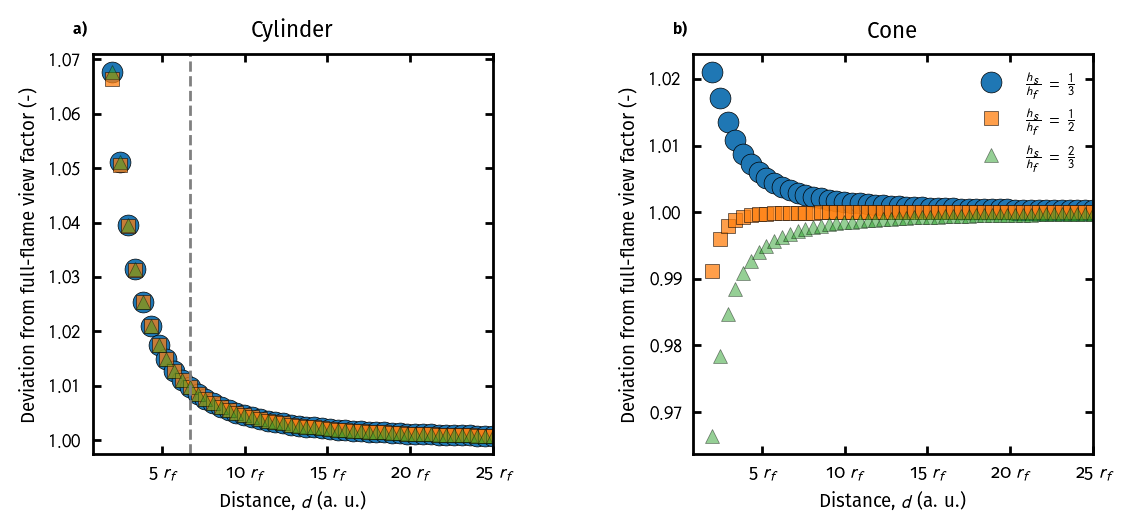

In [4]:
fig, ax, _ = create_subplot(1, 2, spacing = 1)

Ratios_cylinder = VF_cylinder/ VF_cylinder_half

ax[0].plot(d, Ratios_cylinder[:, 0], 'o', mfc='tab:blue', ms=7.5, markeredgewidth=0.25, color='k', label = r'$\frac{h_s}{h_f} = \frac{1}{3}$')
ax[0].plot(d, Ratios_cylinder[:, 1], 's', mfc = 'tab:orange', ms = 5, markeredgewidth=0.25, color = 'k', alpha = 0.75, label = r'$\frac{h_s}{h_f} = \frac{1}{2}$')
ax[0].plot(d, Ratios_cylinder[:, 2], '^', mfc = 'tab:green', ms = 5, markeredgewidth=0.25, color = 'k', alpha = 0.5, label = r'$\frac{h_s}{h_f} = \frac{2}{3}$')

ax[0].set_title("Cylinder")
ax[0].set_xlabel("Distance, $d$ (a. u.)")
ax[0].set_ylabel("Deviation from full-flame view factor (-)")
# ax[0].legend(loc = 'upper right')
ax[0].set_xlim(right = 25*r_f)
ax[0].set_xticklabels([fr'{i/r_f:.0f} $r_f$' for i in ax[0].get_xticks()])

threshold = 1.01
d_threshold = d[np.argmin(np.abs(Ratios_cylinder[:, 0] - threshold))]
ax[0].axvline(x = d_threshold, color = 'gray', linestyle = '--')

# Cone
Ratios_cone = VF_cone/ VF_cone_half 
ax[1].plot(d, Ratios_cone[:, 0], 'o', mfc='tab:blue', ms=7.5, markeredgewidth=0.25, color='k', label = r'$\frac{h_s}{h_f} = \frac{1}{3}$')
ax[1].plot(d, Ratios_cone[:, 1], 's', mfc = 'tab:orange', ms = 5, markeredgewidth=0.25, color = 'k', alpha = 0.75, label = r'$\frac{h_s}{h_f} = \frac{1}{2}$')
ax[1].plot(d, Ratios_cone[:, 2], '^', mfc = 'tab:green', ms = 5, markeredgewidth=0.25, color = 'k', alpha = 0.5, label = r'$\frac{h_s}{h_f} = \frac{2}{3}$')

d1_threshold = d[np.argmin(np.abs(Ratios_cone[:, 0] - threshold))]
d2_threshold = d[np.argmin(np.abs(Ratios_cone[:, 1] - threshold))]
# d3_threshold = d[np.argmin(np.abs(Ratios_cone[:, 2] - threshold))]

# ax[1].axvline(x = d1_threshold, color = 'gray', linestyle = '--')
# ax[1].axvline(x = d2_threshold, color = 'gray', linestyle = '--')
# ax[1].axvline(x = d3_threshold, color = 'gray', linestyle = '--')

# ax[1].set_ylim(0.99, 1.01)
ax[1].set_title("Cone")
ax[1].set_xlabel("Distance, $d$ (a. u.)")
ax[1].set_ylabel("Deviation from full-flame view factor (-)")
ax[1].set_xticklabels([fr'{i/r_f:.0f} $r_f$' for i in ax[1].get_xticks()])
ax[1].legend(loc = 'upper right')
ax[1].set_xlim(right = 25*r_f)
ax[1].set_xticklabels([fr'{i/r_f:.0f} $r_f$' for i in ax[1].get_xticks()])
# Independiente de su altura, el radiometro debe ubicarse siempre a una distancia de X~m para tener un error menor a 1%. Esto es para radio de llama constante.

ax[0].annotate(r'$\textbf{a)}$', xy = (-0.05, 1.05), xycoords = 'axes fraction', fontsize = 'small', fontweight = 'bold')
ax[1].annotate(r'$\textbf{b)}$', xy = (-0.05, 1.05), xycoords = 'axes fraction', fontsize = 'small', fontweight = 'bold')


# fig.savefig("Figures/FlameRadiusConstant.pdf", dpi = 600, bbox_inches = 'tight')

In [7]:
p = 0.01
# Cylinder
r_flame = np.array([20, 40, 60])
VF_cylinder = np.zeros((len(d), len(r_flame)))
VF_cylinder_half = np.zeros((len(d), len(r_flame)))

VF_Cone = np.zeros((len(d), len(r_flame)))
VF_Cone_half = np.zeros((len(d), len(r_flame)))

d_cylinder = np.zeros((len(d), len(r_flame)))
d_cone = np.zeros((len(d), len(r_flame)))

for i in range(len(d)):
    for j in range(len(r_flame)):
        d = np.linspace(2*r_flame[j], 25*r_flame[j], 50)
        VF_cylinder[i, j] = ViewFactorCalculator.analytical_cylinder(20, 2*r_flame[j], d[i], p, 10)[0]
        VF_cylinder_half[i, j] = ViewFactorCalculator.analytical_cylinder(20, 2*r_flame[j], d[i], p, 10)[2]
        
        d_cylinder[i, j] = d[i]

        VF_Cone[i, j] = ViewFactorCalculator.analytical_cone(20, 2*r_flame[j], d[i], 0, p, 10)[0]
        VF_Cone_half[i, j] = ViewFactorCalculator.analytical_cone(20, 2*r_flame[j], d[i], 0, p, 10)[2]

        d_cone[i, j] = d[i]

/tmp/ipykernel_1782617/1238477005.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels([fr'{i/r_f:.0f} $r_f$' for i in ax[0].get_xticks()])
/tmp/ipykernel_1782617/1238477005.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels([fr'{i/r_f:.0f} $r_f$' for i in ax[1].get_xticks()])
/tmp/ipykernel_1782617/1238477005.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels([fr'{i/r_f:.0f} $r_f$' for i in ax[1].get_xticks()])


Text(-0.05, 1.05, '$\\textbf{b)}$')

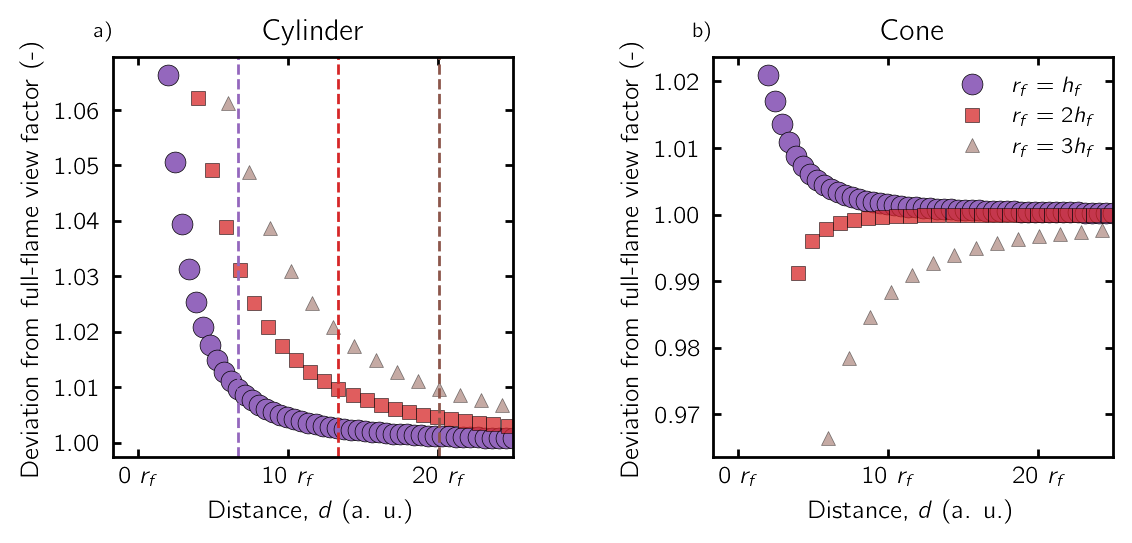

In [8]:
fig, ax, _ = create_subplot(1, 2, spacing = 1)

Ratios_cylinder = VF_cylinder/ VF_cylinder_half

ax[0].plot(d_cylinder[:, 0], Ratios_cylinder[:, 0], 'o', mfc='tab:purple', ms=7.5, markeredgewidth=0.25, color='k', label = fr'$r_f = {r_flame[0]/20:.0f}h_{{f}}$')
ax[0].plot(d_cylinder[:, 1], Ratios_cylinder[:, 1], 's', mfc = 'tab:red', ms = 5, markeredgewidth=0.25, color = 'k', alpha = 0.75, label = fr'$r_f = {r_flame[1]/20:.0f}h_{{f}}$')
ax[0].plot(d_cylinder[:, 2], Ratios_cylinder[:, 2], '^', mfc = 'tab:brown', ms = 5, markeredgewidth=0.25, color = 'k', alpha = 0.5, label = fr'$r_f = {r_flame[2]/20:.0f}h_{{f}}$')

ax[0].set_title("Cylinder")
ax[0].set_xlabel("Distance, $d$ (a. u.)")
ax[0].set_ylabel("Deviation from full-flame view factor (-)")
# ax[0].legend(loc = 'upper right')
ax[0].set_xlim(right = 25*r_f)
ax[0].set_xticklabels([fr'{i/r_f:.0f} $r_f$' for i in ax[0].get_xticks()])

threshold = 1.01
d1_threshold = d_cylinder[np.argmin(np.abs(Ratios_cylinder[:, 0] - threshold)), 0]
d2_threshold = d_cylinder[np.argmin(np.abs(Ratios_cylinder[:, 1] - threshold)), 1]
d3_threshold = d_cylinder[np.argmin(np.abs(Ratios_cylinder[:, 2] - threshold)), 2]

ax[0].axvline(x = d1_threshold, color = 'tab:purple', linestyle = '--')
ax[0].axvline(x = d2_threshold, color = 'tab:red', linestyle = '--')
ax[0].axvline(x = d3_threshold, color = 'tab:brown', linestyle = '--')

# Cone
Ratios_cone = VF_cone/ VF_cone_half 
ax[1].plot(d_cone[:, 0], Ratios_cone[:, 0], 'o', mfc='tab:purple', ms=7.5, markeredgewidth=0.25, color='k', label = fr'$r_f = h_{{f}}$')
ax[1].plot(d_cone[:, 1], Ratios_cone[:, 1], 's', mfc = 'tab:red', ms = 5, markeredgewidth=0.25, color = 'k', alpha = 0.75, label = fr'$r_f = {r_flame[1]/20:.0f}h_{{f}}$')
ax[1].plot(d_cone[:, 2], Ratios_cone[:, 2], '^', mfc = 'tab:brown', ms = 5, markeredgewidth=0.25, color = 'k', alpha = 0.5, label = fr'$r_f = {r_flame[2]/20:.0f}h_{{f}}$')

d1_threshold = d[np.argmin(np.abs(Ratios_cone[:, 0] - threshold))]
d2_threshold = d[np.argmin(np.abs(Ratios_cone[:, 1] - threshold))]
# d3_threshold = d[np.argmin(np.abs(Ratios_cone[:, 2] - threshold))]

# ax[1].axvline(x = d1_threshold, color = 'gray', linestyle = '--')
# ax[1].axvline(x = d2_threshold, color = 'gray', linestyle = '--')
# ax[1].axvline(x = d3_threshold, color = 'gray', linestyle = '--')

# ax[1].set_ylim(0.99, 1.01)
ax[1].set_title("Cone")
ax[1].set_xlabel("Distance, $d$ (a. u.)")
ax[1].set_ylabel("Deviation from full-flame view factor (-)")
ax[1].set_xticklabels([fr'{i/r_f:.0f} $r_f$' for i in ax[1].get_xticks()])
ax[1].legend(loc = 'upper right')
ax[1].set_xlim(right = 25*r_f)
ax[1].set_xticklabels([fr'{i/r_f:.0f} $r_f$' for i in ax[1].get_xticks()])


ax[0].annotate(r'$\textbf{a)}$', xy = (-0.05, 1.05), xycoords = 'axes fraction', fontsize = 'small', fontweight = 'bold')
ax[1].annotate(r'$\textbf{b)}$', xy = (-0.05, 1.05), xycoords = 'axes fraction', fontsize = 'small', fontweight = 'bold')

# fig.savefig("Figures/FlameRadiusVariable.pdf", dpi = 600, bbox_inches = 'tight')

In [102]:
p = 0.01
# Cylinder
# distance = 2 * r_flame 
h_flame = 40
r_flame = np.linspace(10, 40, 25)
h_sensor = np.linspace(0, h_flame, 25)
d = np.array([45, 60, 75])


VF_cylinder = np.zeros((len(r_flame),len(h_sensor), len(d)))
VF_cylinder_half = np.zeros((len(r_flame),len(h_sensor), len(d)))

VF_Cone = np.zeros((len(r_flame),len(h_sensor), len(d)))
VF_Cone_half = np.zeros((len(r_flame),len(h_sensor), len(d)))

for i in range(len(r_flame)):
    for j in range(len(h_sensor)):
        for k in range(len(d)):
            VF_cylinder[i, j, k] = ViewFactorCalculator.analytical_cylinder(h_flame, 2*r_flame[i], d[k], p, h_sensor[j])[0]
            VF_cylinder_half[i, j, k] = ViewFactorCalculator.analytical_cylinder(h_flame, 2*r_flame[i], d[k], p, h_sensor[j])[2]

            VF_Cone[i, j, k] = ViewFactorCalculator.analytical_cone(h_flame, 2*r_flame[i], d[k], 0, p, h_sensor[j])[0]
            VF_Cone_half[i, j, k] = ViewFactorCalculator.analytical_cone(h_flame, 2*r_flame[i], d[k], 0, p, h_sensor[j])[2]

/var/folders/wz/bd7ky1_n2sg7trd39956z5x80000gn/T/ipykernel_30371/993940720.py:41: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  for coll in c.collections:


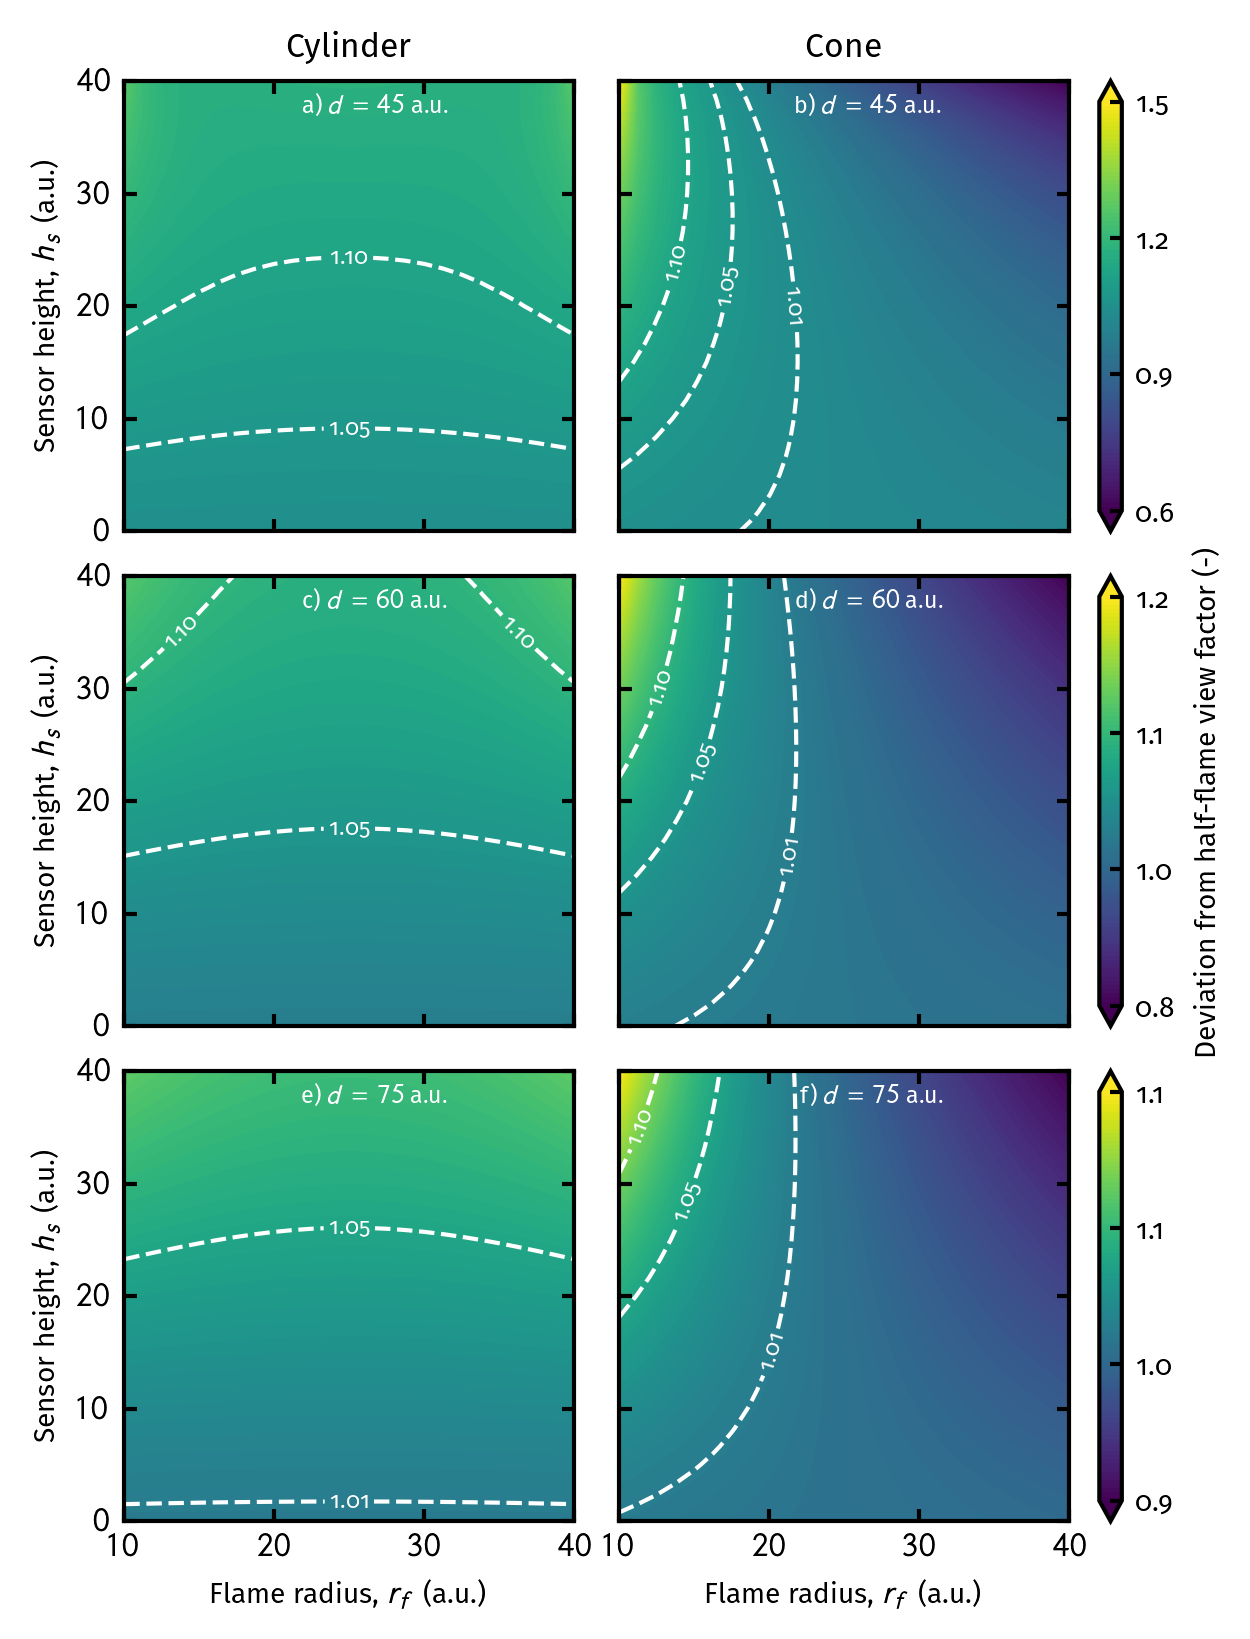

In [132]:
fig, ax, cax = create_subplot(3, 2, axis_width = 1.5, axis_height = 1.5, spacing = 0.15, colorbar_positions=['right', 'right', 'right'], colorbar_sizes=[0.075, 0.075, 0.075], colorbar_subplots=[(0, 1), (1, 1), (2, 1)])
# ax = np.array(ax).reshape(2, 2)

Ratios_cylinder = VF_cylinder / VF_cylinder_half
Ratios_cone = VF_Cone / VF_Cone_half

vmin = np.min([np.min(Ratios_cylinder[:, :, 0]), np.min(Ratios_cone[:, :, 0]    )])
vmax = np.max([np.max(Ratios_cylinder[:, :, 0]), np.max(Ratios_cone[:, :, 0])])

im0 = ax[0].contourf(r_flame, h_sensor, Ratios_cylinder[:, :, 0], levels = np.linspace(vmin, vmax, 100), cmap = 'viridis', extend = 'both')
im1 = ax[1].contourf(r_flame, h_sensor, Ratios_cone[:, :, 0], levels = np.linspace(vmin, vmax, 100), cmap = 'viridis', extend = 'both')


vmin = np.min([np.min(Ratios_cylinder[:, :, 1]), np.min(Ratios_cone[:, :, 1])])
vmax = np.max([np.max(Ratios_cylinder[:, :, 1]), np.max(Ratios_cone[:, :, 1])])

im2 = ax[2].contourf(r_flame, h_sensor, Ratios_cylinder[:, :, 1], levels = np.linspace(vmin, vmax, 100), cmap = 'viridis', extend = 'both')
im3 = ax[3].contourf(r_flame, h_sensor, Ratios_cone[:, :, 1], levels = np.linspace(vmin, vmax, 100), cmap = 'viridis', extend = 'both')

vmin = np.min([np.min(Ratios_cylinder[:, :, 2]), np.min(Ratios_cone[:, :, 2])])
vmax = np.max([np.max(Ratios_cylinder[:, :, 2]), np.max(Ratios_cone[:, :, 2])])

im4 = ax[4].contourf(r_flame, h_sensor, Ratios_cylinder[:, :, 2], levels = np.linspace(vmin, vmax, 100), cmap = 'viridis', extend = 'both')
im5 = ax[5].contourf(r_flame, h_sensor, Ratios_cone[:, :, 2], levels = np.linspace(vmin, vmax, 100), cmap = 'viridis', extend = 'both')

# Add white contours at 1.01, 1.05, and 1.1 with labels over the lines for all subplots
contour_levels = [1.01, 1.05, 1.1]
conts = []
conts.append(ax[0].contour(r_flame, h_sensor, Ratios_cylinder[:, :, 0], levels=contour_levels, colors='white', linewidths=1, linestyles='--'))
conts.append(ax[1].contour(r_flame, h_sensor, Ratios_cone[:, :, 0], levels=contour_levels, colors='white', linewidths=1, linestyles='--'))
conts.append(ax[2].contour(r_flame, h_sensor, Ratios_cylinder[:, :, 1], levels=contour_levels, colors='white', linewidths=1, linestyles='--'))
conts.append(ax[3].contour(r_flame, h_sensor, Ratios_cone[:, :, 1], levels=contour_levels, colors='white', linewidths=1, linestyles='--'))
conts.append(ax[4].contour(r_flame, h_sensor, Ratios_cylinder[:, :, 2], levels=contour_levels, colors='white', linewidths=1, linestyles='--'))
conts.append(ax[5].contour(r_flame, h_sensor, Ratios_cone[:, :, 2], levels=contour_levels, colors='white', linewidths=1, linestyles='--'))

# Add labels over the contour lines for all subplots
for i in range(6):
    ax[i].clabel(conts[i], fmt={level: f"{level:.2f}" for level in contour_levels}, colors='white', fontsize='small', inline=True)

for c in [im0, im1, im2, im3, im4, im5]:
    for coll in c.collections:
        coll.set_rasterized(True)

# Add a colorbar for each cax
cbars = []
im_list = [im0, im1, im2, im3, im4, im5]
for i in range(len(cax)):
    vmin = im_list[i*2].get_clim()[0]
    vmax = im_list[i*2].get_clim()[1]
    # Set 4 evenly spaced ticks between vmin and vmax
    ticks = np.linspace(vmin, vmax, 4)
    # Format ticks: use integer if all are close to integer, else use .1f
    if np.allclose(ticks, np.round(ticks)):
        ticklabels = [f"{int(round(t))}" for t in ticks]
    else:
        ticklabels = [f"{t:.1f}" for t in ticks]
    cbar = fig.colorbar(im_list[i*2], cax=cax[i], ticks=ticks)
    cbar.ax.set_yticklabels(ticklabels)

    if i == 1:
        cbar.ax.set_ylabel('Deviation from half-flame view factor (-)')
    else:
        cbar.ax.set_ylabel('')

    cbars.append(cbar)

# ax[0].set_xlabel(r'Flame radius, $r_f$ (a.u.)')
ax[0].set_ylabel(r'Sensor height, $h_s$ (a.u.)')
ax[2].set_ylabel(r'Sensor height, $h_s$ (a.u.)')
ax[4].set_ylabel(r'Sensor height, $h_s$ (a.u.)')


ax[4].set_xlabel(r'Flame radius, $r_f$ (a.u.)')
ax[5].set_xlabel(r'Flame radius, $r_f$ (a.u.)')

# ax[1].set_xlabel(r'Flame radius, $r_f$ (a.u.)')
# ax[1].set_ylabel(r'Sensor height, $h_s$ (a.u.)')

ax[0].set_xticklabels([])
ax[1].set_xticklabels([])
ax[2].set_xticklabels([])
ax[3].set_xticklabels([])
# ax[4].set_xticklabels([])
# ax[5].set_xticklabels([])

ax[1].set_yticklabels([])
ax[3].set_yticklabels([])
ax[5].set_yticklabels([])

ax[0].set_title(r'Cylinder')
ax[1].set_title(r'Cone')

ax[0].annotate(r'$\text{a)}\,d = 45$~a.u.', xy = (0.72, 0.97), va = 'top', ha = 'right', xycoords = 'axes fraction', fontsize = 'small', fontweight = 'bold', color = 'white')
ax[1].annotate(r'$\text{b)}\,d = 45$~a.u.', xy = (0.72, 0.97), va = 'top', ha = 'right', xycoords = 'axes fraction', fontsize = 'small', fontweight = 'bold', color = 'white')
ax[2].annotate(r'$\text{c)}\,d = 60$~a.u.', xy = (0.72, 0.97), va = 'top', ha = 'right', xycoords = 'axes fraction', fontsize = 'small', fontweight = 'bold', color = 'white')
ax[3].annotate(r'$\text{d)}\,d = 60$~a.u.', xy = (0.72, 0.97), va = 'top', ha = 'right', xycoords = 'axes fraction', fontsize = 'small', fontweight = 'bold', color = 'white')
ax[4].annotate(r'$\text{e)}\,d = 75$~a.u.', xy = (0.72, 0.97), va = 'top', ha = 'right', xycoords = 'axes fraction', fontsize = 'small', fontweight = 'bold', color = 'white')
ax[5].annotate(r'$\text{f)}\,d = 75$~a.u.', xy = (0.72, 0.97), va = 'top', ha = 'right', xycoords = 'axes fraction', fontsize = 'small', fontweight = 'bold', color = 'white')

fig.savefig('Figures/2D_VF.pdf', dpi = 600, bbox_inches = 'tight')

# Flickering

In [2]:
from PlotTools import create_subplot

In [42]:
w = 7 # Hz
period = 1 / w
t_biomass = np.linspace(0, 2*period, 200)
Amplitude = 5

r_f = 10
xf = Amplitude*np.sin(2*np.pi*w*t_biomass)
h = 20 - t_biomass/3
# h = np.ones(len(t))*17.5

distance = 2 * r_f

VF_biomass_cone = np.zeros(len(t_biomass))
VF_biomass_noflicker = np.zeros(len(t_biomass))
p = 0.01

for i in range(len(t_biomass)):
    VF_biomass_cone[i] = ViewFactorCalculator.analytical_cone(h[i], 2*r_f, distance, xf[i], p, 10)[0]
    VF_biomass_noflicker[i] = ViewFactorCalculator.analytical_cone(h[i], 2*r_f, distance, 0, p, 10)[0]

In [43]:
w = 7 # Hz
period = 1 /w

t_pool = np.linspace(0, 2*period, 200)
Amplitude = 5

r_f = 10
xf = Amplitude*np.sin(2*np.pi*w*t_pool)
h = 17.5 + 2.5 * np.sin(2 * np.pi * w * t_pool)

distance = 2 * r_f

VF_pool_cone = np.zeros(len(t_pool))
VF_pool_cone_noflicker = np.zeros(len(t_pool))
p = 0.01

for i in range(len(t_pool)):
    VF_pool_cone[i] = ViewFactorCalculator.analytical_cone(h[i], 2*r_f, distance, xf[i], p, 10)[0]
    VF_pool_cone_noflicker[i] = ViewFactorCalculator.analytical_cone(h[i], 2*r_f, distance, 0, p, 10)[0]

# mask = xf > 0

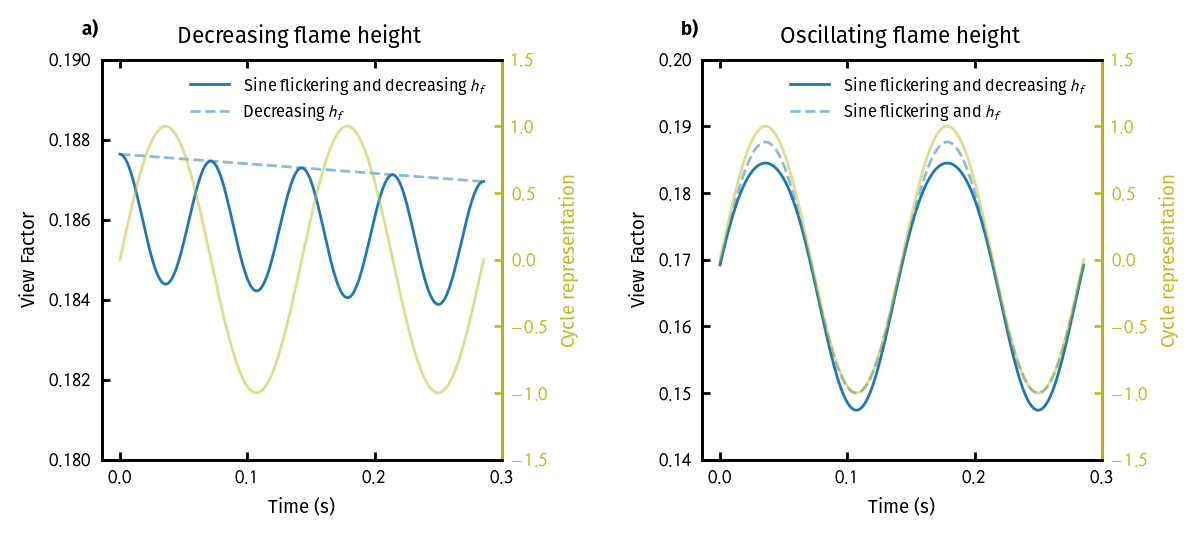

In [68]:
fig, ax, _ = create_subplot(1, 2)


ax[0].plot(t_biomass, VF_biomass_cone, '-', color = 'tab:blue', label = 'Sine flickering and decreasing $h_f$')
ax[0].plot(t_biomass, VF_biomass_noflicker, '--', color = 'tab:blue', alpha = 0.5, label = 'Decreasing $h_f$')

ax0 = ax[0].twinx()
ax0.plot(t_biomass, np.sin(2*np.pi*w*t_biomass), '-', color = 'tab:olive', alpha = 0.5)
ax0.tick_params(axis='y', colors='tab:olive')
ax0.spines['right'].set_color('tab:olive')
ax0.set_ylabel('Cycle representation', color = 'tab:olive')
ax0.set_ylim(-1.5, 1.5)

ax[0].legend(loc = 'best')
ax[0].set_ylim(0.18, 0.19)
# ax[0].set_ylim(0.14, 0.2)

ax[1].plot(t_pool, VF_pool_cone, '-', color = 'tab:blue', label = 'Sine flickering and decreasing $h_f$')
ax[1].plot(t_pool, VF_pool_cone_noflicker, '--', color = 'tab:blue', alpha = 0.5, label = 'Sine flickering and $h_f$')

ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('View Factor')
ax[0].set_title('Decreasing flame height')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('View Factor')
ax[1].set_title('Oscillating flame height')

ax[1].legend(loc = 'best')
ax[1].set_ylim(0.14, 0.2)

ax1 = ax[1].twinx()
ax1.plot(t_pool, np.sin(2*np.pi*w*t_pool), '-', color = 'tab:olive', alpha = 0.5)
ax1.tick_params(axis='y', colors='tab:olive')
ax1.spines['right'].set_color('tab:olive')
ax1.set_ylabel('Cycle representation', color = 'tab:olive')
ax1.set_ylim(-1.5, 1.5)

# ax[1].set_xlim(0, 1 / w)
# print(w)
# ax2 = ax[1].twinx()
# ax2.plot(t_pool, np.sin(2*np.pi*w*t_pool), '-', color = 'k', alpha = 0.1)
# ax2.set_xlim(0, 1/w)

ax[0].annotate(r'\textbf{a)}', xy = (-0.05, 1.1), xycoords = 'axes fraction', va = 'top', ha = 'left')
ax[1].annotate(r'\textbf{b)}', xy = (-0.05, 1.1), xycoords = 'axes fraction', va = 'top', ha = 'left')

fig.savefig('Figures/Application_ViewFactor.pdf', dpi = 600, bbox_inches = 'tight')